1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

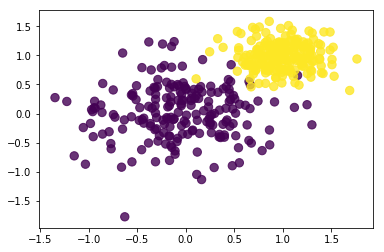

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

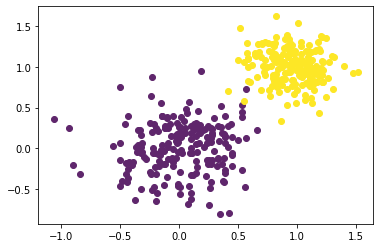

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

g1 = np.random.normal(0, 0.3, (200,2))
g2 = np.random.normal(1, 0.2, (200,2))

fig = plt.figure(figsize=(6, 4))
plt.scatter(x=g1[:,0], y=g1[:,1], marker='o', c='#5f266c')
plt.scatter(x=g2[:,0], y=g2[:,1], marker='o', c='#fde726')

plt.show()


2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Text(0, 0.5, 'Entries')

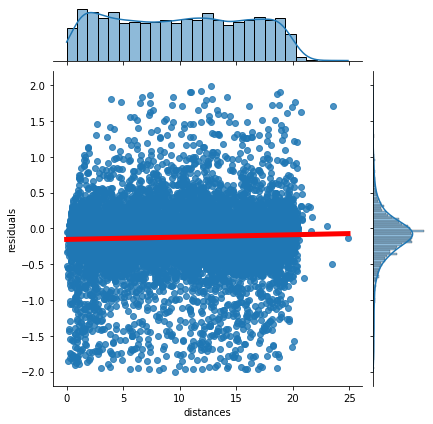

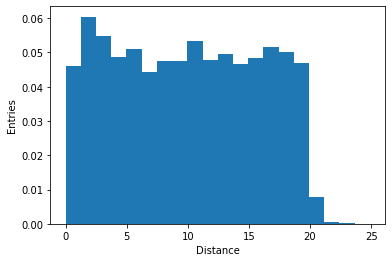

In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats

unpickled = pd.read_pickle("../data/residuals_261.pkl")
unpickled_data = np.array(unpickled, ndmin = 1)

data = pd.DataFrame(unpickled_data[0])
data = data[np.abs(data['residuals']) < 2]

g = sns.jointplot(x = 'distances', y = 'residuals', data = data, kind = 'reg', line_kws = {'lw':5, 'color':'r'})

fig, ax = plt.subplots(figsize=(6, 4))
h, bins, _ = plt.hist(data['distances'], bins=20, density=True, cumulative=False)
ax.set_xlabel('Distance')
ax.set_ylabel('Entries')

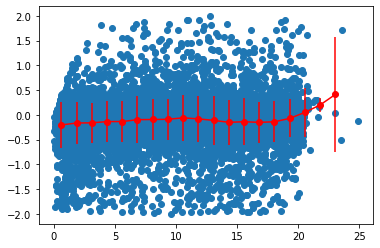

In [4]:
pd.plotting.register_matplotlib_converters()
pd.plotting.deregister_matplotlib_converters()
x = (bins[1:] + bins[:-1]) / 2
y = []
err_y = []

for i in range(20):
    y.append(data.loc[(data['distances'] >= bins[i]) & (data['distances'] < bins[i + 1])]['residuals'].mean())
    err_y.append(data.loc[(data['distances'] >= bins[i]) & (data['distances'] < bins[i + 1])]['residuals'].std())

plt.scatter(data['distances'], data['residuals'])
plt.errorbar(x, y, err_y, color = 'r', marker = 'o')
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


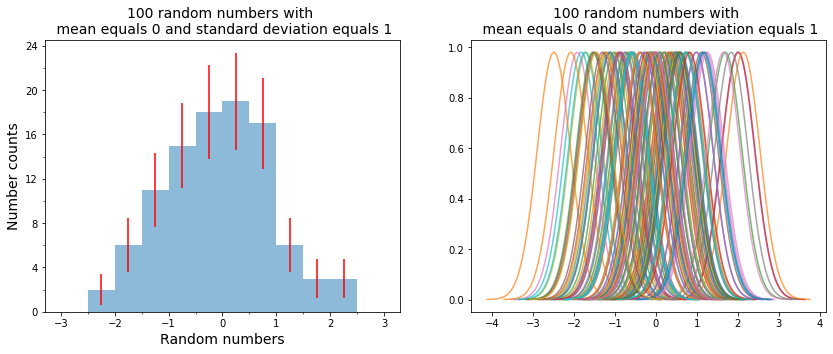

In [5]:
import math
from matplotlib.ticker import MultipleLocator
import scipy as sp
from scipy import stats

mean = 0
std = 1
n = 100
x = np.random.normal(mean, std, n)
bin_width = std / 2

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
ax1.set_title(str(n) + ' random numbers with ' + '\n mean equals ' + str(mean) + ' and standard deviation equals ' + str(std), fontsize = 14)
ax1.set_xlabel('Random numbers', fontsize = 14)
ax1.set_ylabel('Number counts', fontsize = 14)
ax1.xaxis.set_major_locator(MultipleLocator(std))
ax1.xaxis.set_minor_locator(MultipleLocator(bin_width))
ax1.yaxis.set_major_locator(MultipleLocator(4))
ax1.yaxis.set_minor_locator(MultipleLocator(2))

bins = np.arange(math.floor(x.min()), math.ceil(x.max()) + bin_width, bin_width)
h, bins, _ = ax1.hist(x, bins, alpha = 0.5)

err_x = (bins[1:] + bins[:-1]) / 2
ax1.errorbar(err_x, h, np.sqrt(h), fmt = 'none', color="r")

ax2.set_title(str(n) + ' random numbers with ' + '\n mean equals ' + str(mean) + ' and standard deviation equals ' + str(std), fontsize = 14)
std_gauss = 1.06 * x.std() * (x.size**(-1/5))

for i in x: 
    x_gauss = np.linspace(i - 4 * std_gauss, i + 4 * std_gauss, 100)
    y_gauss = stats.norm.pdf(x_gauss, loc = i, scale = std_gauss)
    ax2.plot(x_gauss, y_gauss, alpha = 0.7)
    